### The structure of the DDPG:
The DDPG has two component: actor and critic:
- actor: A two hidden layers network, the input is the state and the output is the best actions in action space. It has two hidden layers with 256 and 128 nodes respectively. The active function is relu except the last layer :tanh
- critic: A two hidden layers layer network, the input the state and action. The first layer input is the state, and the outcome of the first layer will be combined with the action. Then they are feeded into the second hidden layer. The output of the critic is the q value. 
### Training Algorithm:
According to this [paper](https://arxiv.org/pdf/1509.02971.pdf), two techniques are used:
1. Experience Replay: A pool of 10,000 ("state","action","reward","next_state","done") is used. Each time 128 random samples are selected from the pool for training
2. Fixed target network: two same structure networks are used for both actor and critic. A local network is updated every 4 step. A target network is updated by using only 1/1000 of the local network every time (soft update) 

The critic network is updated by the following equation  : <br/>
$U(D)[(r+\gamma Q'(s',\mu';w^{-})-Q(s,\mu;w))^2] $ <br/>
$U(D)$ stands for the the minibatch we random sample from the experience pool and can break the correlation between the continuously  Q value and the action.$\mu$ is the outcome of the action network For each step, we update $w$ every 4 step and $w^{-}$ is only updated 1/1000 of the $w$ each time. Since updating a guess with a guess can lead to harmful correlation <br/>
This algorithm works, we can see the improvement of the rewards.<br/>

The actor network is updated by maximize the q value from the critic network by using the gradient ascent. Other techniques used are the same as the critic network. 

### Training hyperparameters:
episodes used for training the one agent version is 1000, learning rate is 0.0005 and it takes about 500 episodes to solve it. For the twenty agents version, it can be solved in 100 episodes.
### Future ideas:
1. Distributed training, PPO, A3C
2. Try Prioritized Experience Replay
2. Try different network structure

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Episode #')

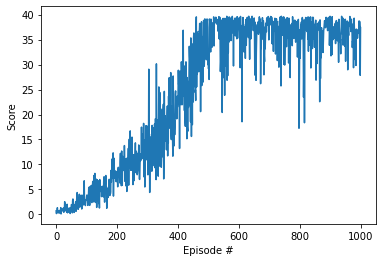

In [4]:
#one agent version
scores_data = np.load("scores_data.npz")
scores=scores_data['arr_0'].reshape(-1)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)),scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

Text(0.5, 0, 'Episode #')

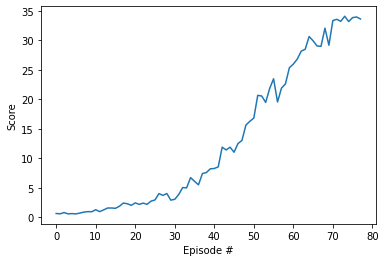

In [5]:
#twenty agents version
scores_data = np.load("scores_data_20agents.npz")
train_scores=scores_data['arr_0']
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(train_scores.shape[0]),train_scores.squeeze(-1).mean(axis=-1))
plt.ylabel('Score')
plt.xlabel('Episode #')